In [23]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import rasterio
import glob
from rasterio import plot
from rasterio.plot import show
from rasterio.mask import mask
from pathlib import Path

%matplotlib inline

In [24]:
def normalize(band):
    band_min, band_max = (band.min(), band.max())
    return ((band-band_min)/((band_max - band_min)))

In [25]:
def load_sentinel_image(img_folder, bands):
    image = {}
    path = Path(img_folder)
    for band in bands:
        # considering the sentinel images end with *_B#_10m.jp2, we will use it to locate the correct file
        file = next(path.glob(f'*_{band}_10m.jp2'))
        print(f'Opening file {file}')
        ds = rasterio.open(file, driver='JP2OpenJPEG')
        image.update({band: ds})
    return image

In [26]:
def save_rgb(filename, img, b_r, b_g, b_b, alpha=1., figsize=(10, 10)):
    profile = img[b_r].profile
    profile.update(
        #dtype=rasterio.uint8,
        count=3,
        compress='lzw',
        driver='Gtiff'
    )    
    with rasterio.open(filename, 'w', **profile) as rgb:
        rgb.write(normalize(img[b_b].read(1)), 1)
        rgb.write(normalize(img[b_g].read(1)), 2)
        rgb.write(normalize(img[b_r].read(1)), 3)
        rgb.close()
    

In [27]:
pathOne = '/home/data/28993b79-d5dc-48b1-8c61-3d31eafd0b88/'
img = load_sentinel_image(pathOne, ['B02','B03','B04'])

Opening file /home/data/28993b79-d5dc-48b1-8c61-3d31eafd0b88/T19NDE_20220127T150719_B02_10m.jp2
Opening file /home/data/28993b79-d5dc-48b1-8c61-3d31eafd0b88/T19NDE_20220127T150719_B03_10m.jp2
Opening file /home/data/28993b79-d5dc-48b1-8c61-3d31eafd0b88/T19NDE_20220127T150719_B04_10m.jp2


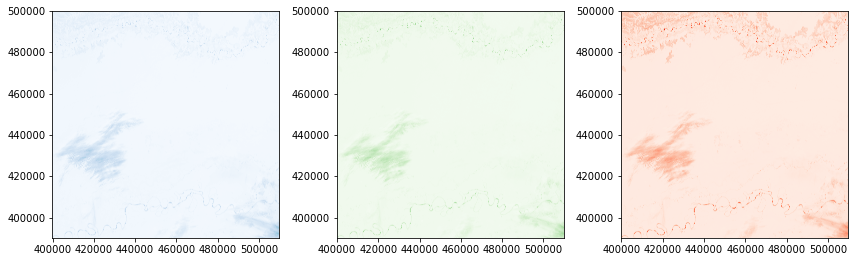

In [13]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 4))
plot.show(img['B02'], ax=ax1, cmap='Blues')
plot.show(img['B03'], ax=ax2, cmap='Greens')
plot.show(img['B04'], ax=ax3, cmap='Reds')
fig.tight_layout()

In [ ]:
# natural color
save_rgb('/home/data/rgb.tif', img, 'B04', 'B03', 'B02')

In [19]:
%matplotlib inline

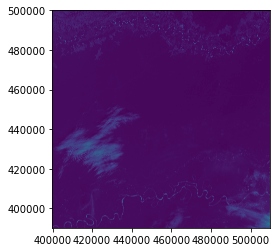

<AxesSubplot:>

In [20]:
src = rasterio.open(r"/home/data/rgb.tif", count=3)
plot.show(src)
